# 구매이력 데이터 클러스터링

## 0. 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
# import dataload
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
cd /content/drive/MyDrive/2021/날씨 공모전/code

/content/drive/MyDrive/2021/날씨 공모전/code


In [4]:
buy_full = pd.read_csv('../data/final_0606.csv', encoding='cp949').iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
product = pd.read_csv('../data/ProductFiltering.csv', encoding='cp949')
steady = pd.read_csv('../data/SteadySeller.csv', encoding='cp949')

In [19]:
buy_full = buy_full[buy_full.sm_cat.isin(list(product.sm_cat.unique()))]
print(buy_full.shape)
buy_full.head()

(1303336, 30)


,date,sex,age,big_cat,sm_cat,qty,cnt,ratio,오늘날씨,미세먼지,오늘 비,기상정보,태풍정보,avg_ta,max_ta,min_ta,rn_day,rn_hr1,avg_ws,PM10,PM25,hm_max,sum_ss_hr,max_pa,분기,요일,공휴일명,공휴일여부,주말여부,계절
16,2018-01-01,F,20,냉난방가전,가열식 가습기,1.0,1.7408,24.75961,10.69387,4.09137,0.00000,0.00000,0.04440,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,1월1일,1,0,3
17,2018-01-01,F,30,냉난방가전,가열식 가습기,0.0,0.0000,17.93893,12.42969,6.35294,0.00000,0.51282,0.42417,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,1월1일,1,0,3
18,2018-01-01,F,40,냉난방가전,가열식 가습기,3.0,1.7408,11.07055,13.02249,4.88037,0.00000,0.40650,0.00000,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,1월1일,1,0,3
19,2018-01-01,F,50,냉난방가전,가열식 가습기,0.0,0.0000,12.60504,11.69080,4.53350,1.21951,0.90909,0.00000,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,1월1일,1,0,3
20,2018-01-01,F,60,냉난방가전,가열식 가습기,0.0,0.0000,4.25531,13.92712,5.47887,0.00000,0.00000,0.00000,0.885198,5.464146,-2.88074,0.0,0.0,2.157094,44.015611,21.477208,61.923313,52.276365,1020.592385,1,0,1월1일,1,0,3


## 1. 데이터 정제

In [12]:
def make_tsdata(data):
    data['date'] = data['date'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))
    data['year'] = data['date'].apply(lambda x : x.year)
    buy_2018 = data[data.year==2018][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
    buy_2019 = data[data.year==2019][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
    
    # 2018, 2019 데이터를 요일에 맞추기
    buy_2018["date"] = buy_2018["date"] + datetime.timedelta(days=-1)
    buy_2018['date'] = buy_2018["date"].apply(lambda x : x.replace(year=2018, month=12, day=31) if x==datetime.date(2017, 12, 31) else x)
    # 데이터 재구조화 (피벗테이블)
    buy_2018_cat = buy_2018.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
    buy_2019_cat = buy_2019.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
    buy_2018_cat["date"] = buy_2018_cat["date"].apply(lambda x : str(x)[5:10])
    buy_2019_cat["date"] = buy_2019_cat["date"].apply(lambda x : str(x)[5:10])
    buy_2018_ts = pd.pivot_table(buy_2018_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
    buy_2019_ts = pd.pivot_table(buy_2019_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
    # 결측치 처리
    buy_2018_ts = buy_2018_ts.fillna(0); buy_2019_ts = buy_2019_ts.fillna(0)

    return buy_2018_ts, buy_2019_ts

In [ ]:
'''
buy_full['date'] = buy_full['date'].apply(lambda x : pd.to_datetime(str(x), format='%Y-%m-%d'))

In [ ]:
'''
buy_full['year'] = buy_full['date'].apply(lambda x : x.year)
buy_2018 = buy_full[buy_full.year==2018][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2019 = buy_full[buy_full.year==2019][['date', 'sex', 'age', 'big_cat', 'sm_cat', 'qty']]
buy_2018.shape, buy_2019.shape

((1005487, 6), (1051412, 6))

### 1-1. 2018, 2019 데이터를 요일에 맞추기

In [ ]:
'''
buy_2018["date"] = buy_2018["date"] + datetime.timedelta(days=-1)
buy_2018['date'] = buy_2018["date"].apply(lambda x : x.replace(year=2018, month=12, day=31) if x==datetime.date(2017, 12, 31) else x)

### 1-2. 데이터 재구조화

In [ ]:
'''
buy_2018_cat = buy_2018.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2019_cat = buy_2019.groupby(['date', 'big_cat', 'sm_cat']).sum('qty').reset_index()[['date', 'big_cat', 'sm_cat', 'qty']]
buy_2018_cat["date"] = buy_2018_cat["date"].apply(lambda x : str(x)[5:10])
buy_2019_cat["date"] = buy_2019_cat["date"].apply(lambda x : str(x)[5:10])
buy_2018_ts = pd.pivot_table(buy_2018_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2019_ts = pd.pivot_table(buy_2019_cat, index=['big_cat', 'sm_cat'], columns="date", values="qty")
buy_2018_ts.shape, buy_2019_ts.shape

((383, 365), (383, 365))

In [ ]:
'''
buy_2018_ts.head()

date             01-01  01-02  01-03  01-04  ...  12-28  12-29  12-30  12-31
big_cat sm_cat                               ...                            
냉난방가전   가스온수기      NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
        가열식 가습기   23.0   12.0   15.0   18.0  ...   15.0   23.0   16.0    7.0
        공기정화 용품  191.0  161.0  118.0  196.0  ...   61.0   80.0  150.0  120.0
        공기청정기    147.0  103.0   77.0  141.0  ...   84.0   88.0  289.0  106.0
        난방용 열풍기    NaN    NaN    1.0    1.0  ...    NaN    NaN    3.0    NaN

[5 rows x 365 columns]

In [ ]:
'''
buy_2019_ts.head()

date             01-01  01-02  01-03  01-04  ...  12-28  12-29  12-30  12-31
big_cat sm_cat                               ...                            
냉난방가전   가스온수기      NaN    1.0    NaN    NaN  ...    NaN    NaN    NaN    NaN
        가열식 가습기   26.0   27.0   27.0   20.0  ...   14.0    7.0   18.0   15.0
        공기정화 용품  116.0  160.0  144.0  142.0  ...  136.0  105.0  196.0  211.0
        공기청정기    138.0  159.0  113.0   93.0  ...   55.0   85.0  135.0   78.0
        난방용 열풍기    NaN    2.0    NaN    NaN  ...    NaN    NaN    1.0    1.0

[5 rows x 365 columns]

### 1-3. 결측치 처리

In [ ]:
'''
buy_2018_ts = buy_2018_ts.fillna(0)
buy_2019_ts = buy_2019_ts.fillna(0)

## 2. 시계열 클러스터링  
`식품` 대분류 데이터

In [22]:
buy_2018_ts, buy_2019_ts = make_tsdata(buy_full)

In [24]:
buy_2018_food = buy_2018_ts.loc[('식품',)]
buy_2019_food = buy_2019_ts.loc[('식품',)]

### 2-1. 정규화

In [25]:
avg_lst = []; std_lst = []
for idx, row in tqdm(buy_2018_food.iterrows()):
    avg_lst.append(row.mean())
    std_lst.append(row.std())

In [26]:
buy_2018_food['avg'] = avg_lst
buy_2018_food['std'] = std_lst
buy_2018_food.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,01-11,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,...,11-24,11-25,11-26,11-27,11-28,11-29,11-30,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,avg,std
sm_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
갈비/찜/바비큐용 돈육,7.0,5.0,13.0,9.0,12.0,6.0,9.0,20.0,15.0,13.0,13.0,17.0,18.0,19.0,16.0,12.0,10.0,10.0,12.0,12.0,7.0,12.0,14.0,22.0,16.0,4.0,17.0,13.0,5.0,18.0,5.0,7.0,9.0,13.0,11.0,18.0,18.0,18.0,21.0,14.0,...,16.0,19.0,11.0,17.0,21.0,18.0,15.0,13.0,11.0,28.0,16.0,13.0,16.0,18.0,13.0,12.0,15.0,22.0,16.0,21.0,19.0,25.0,46.0,27.0,21.0,21.0,9.0,12.0,17.0,20.0,21.0,24.0,12.0,12.0,22.0,20.0,17.0,22.0,14.671233,6.046193
감/홍시,60.0,51.0,58.0,48.0,23.0,34.0,51.0,39.0,58.0,47.0,32.0,35.0,32.0,46.0,34.0,54.0,48.0,45.0,29.0,34.0,46.0,52.0,36.0,46.0,42.0,23.0,32.0,50.0,50.0,43.0,36.0,34.0,21.0,22.0,33.0,65.0,29.0,33.0,18.0,24.0,...,37.0,51.0,71.0,45.0,37.0,31.0,25.0,37.0,42.0,38.0,28.0,44.0,32.0,30.0,46.0,37.0,35.0,50.0,47.0,34.0,35.0,30.0,32.0,18.0,27.0,29.0,30.0,18.0,19.0,10.0,101.0,21.0,36.0,30.0,19.0,23.0,24.0,50.0,29.821918,27.802256
감귤/한라봉/오렌지,1019.0,1007.0,878.0,1078.0,659.0,859.0,1356.0,1123.0,1305.0,1121.0,1199.0,752.0,883.0,1445.0,1326.0,1124.0,1070.0,796.0,718.0,902.0,1458.0,1186.0,1480.0,1378.0,1407.0,810.0,1004.0,1616.0,1286.0,1901.0,1368.0,1302.0,1282.0,2164.0,2845.0,2264.0,2899.0,2894.0,2406.0,1727.0,...,926.0,1236.0,1237.0,1093.0,1049.0,871.0,778.0,900.0,1191.0,930.0,1584.0,1469.0,976.0,985.0,1503.0,2117.0,1420.0,1512.0,1719.0,987.0,910.0,1512.0,2117.0,1593.0,1572.0,1477.0,962.0,736.0,1177.0,1433.0,1056.0,1641.0,1295.0,1713.0,854.0,1355.0,1801.0,883.0,666.608219,535.753821
감말랭이,32.0,28.0,30.0,23.0,29.0,28.0,47.0,25.0,29.0,30.0,21.0,20.0,24.0,35.0,30.0,22.0,31.0,22.0,19.0,27.0,32.0,31.0,61.0,39.0,24.0,28.0,29.0,44.0,31.0,59.0,45.0,39.0,23.0,47.0,75.0,76.0,55.0,58.0,45.0,33.0,...,16.0,17.0,23.0,20.0,16.0,20.0,12.0,22.0,16.0,17.0,18.0,17.0,18.0,17.0,21.0,89.0,26.0,26.0,39.0,18.0,13.0,17.0,31.0,17.0,17.0,15.0,14.0,8.0,9.0,19.0,18.0,19.0,22.0,21.0,22.0,17.0,15.0,27.0,12.646575,12.459760
갓김치,35.0,19.0,28.0,21.0,11.0,22.0,33.0,25.0,146.0,37.0,33.0,16.0,25.0,37.0,37.0,48.0,21.0,25.0,12.0,17.0,37.0,42.0,327.0,29.0,45.0,25.0,28.0,55.0,102.0,29.0,41.0,49.0,31.0,53.0,68.0,72.0,61.0,67.0,38.0,38.0,...,36.0,51.0,41.0,67.0,28.0,32.0,44.0,28.0,48.0,27.0,50.0,31.0,23.0,10.0,26.0,41.0,30.0,66.0,41.0,26.0,17.0,32.0,34.0,29.0,24.0,24.0,34.0,21.0,21.0,30.0,24.0,41.0,46.0,27.0,31.0,24.0,21.0,26.0,61.030137,66.785220


In [27]:
for i in tqdm(range(len(buy_2018_food))):
    for j in range(365):
        buy_2018_food.iloc[i,j] = (buy_2018_food.iloc[i,j] - buy_2018_food.iloc[i,365])/buy_2018_food.iloc[i,366]

In [28]:
buy_2018_food = buy_2018_food.drop(['avg','std'], axis=1)

In [29]:
avg_lst = []; std_lst = []
for idx, row in tqdm(buy_2019_food.iterrows()):
    avg_lst.append(row.mean())
    std_lst.append(row.std())

In [33]:
buy_2019_food['avg'] = avg_lst
buy_2019_food['std'] = std_lst
buy_2019_food.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,01-11,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,...,11-24,11-25,11-26,11-27,11-28,11-29,11-30,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,avg,std
sm_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
갈비/찜/바비큐용 돈육,23.0,17.0,13.0,9.0,21.0,14.0,18.0,14.0,19.0,14.0,15.0,26.0,22.0,19.0,17.0,19.0,33.0,16.0,11.0,14.0,7.0,23.0,16.0,24.0,20.0,15.0,26.0,37.0,15.0,16.0,13.0,13.0,20.0,11.0,23.0,18.0,17.0,12.0,22.0,20.0,...,27.0,42.0,21.0,21.0,16.0,19.0,19.0,26.0,17.0,23.0,47.0,42.0,20.0,28.0,22.0,27.0,16.0,20.0,24.0,23.0,27.0,27.0,18.0,25.0,28.0,25.0,25.0,22.0,47.0,28.0,30.0,32.0,26.0,15.0,34.0,25.0,35.0,37.0,22.435616,11.044582
감/홍시,31.0,28.0,32.0,34.0,25.0,22.0,29.0,29.0,30.0,31.0,19.0,16.0,18.0,32.0,32.0,45.0,25.0,20.0,32.0,26.0,27.0,24.0,31.0,26.0,21.0,24.0,31.0,35.0,33.0,25.0,21.0,16.0,12.0,7.0,8.0,9.0,9.0,20.0,24.0,18.0,...,47.0,89.0,80.0,76.0,67.0,70.0,61.0,58.0,54.0,58.0,63.0,54.0,48.0,42.0,45.0,58.0,36.0,46.0,39.0,28.0,45.0,32.0,46.0,51.0,42.0,39.0,31.0,29.0,26.0,38.0,28.0,40.0,31.0,26.0,32.0,32.0,39.0,32.0,30.602740,36.027668
감귤/한라봉/오렌지,1437.0,1652.0,1995.0,1292.0,1633.0,1519.0,2121.0,1751.0,1673.0,1259.0,1526.0,1055.0,1382.0,1753.0,2330.0,1682.0,1609.0,1310.0,1163.0,1898.0,2256.0,1943.0,2325.0,2035.0,2331.0,1714.0,2179.0,4227.0,4085.0,1797.0,1123.0,818.0,602.0,495.0,439.0,335.0,876.0,798.0,993.0,784.0,...,1380.0,1498.0,2037.0,1361.0,1515.0,1193.0,849.0,1953.0,1512.0,1411.0,1577.0,1214.0,1340.0,1355.0,1279.0,1953.0,1599.0,2064.0,1334.0,967.0,889.0,1383.0,1831.0,1433.0,1472.0,1469.0,1154.0,1018.0,1498.0,1511.0,1322.0,1471.0,1760.0,1306.0,1541.0,1423.0,1479.0,1238.0,879.460274,575.640538
감말랭이,18.0,31.0,17.0,20.0,10.0,27.0,23.0,29.0,26.0,26.0,13.0,12.0,20.0,29.0,37.0,12.0,31.0,12.0,14.0,21.0,14.0,35.0,32.0,28.0,27.0,20.0,29.0,36.0,33.0,37.0,12.0,7.0,5.0,7.0,4.0,3.0,7.0,10.0,11.0,4.0,...,9.0,18.0,14.0,25.0,13.0,20.0,27.0,13.0,25.0,24.0,29.0,47.0,72.0,37.0,30.0,32.0,36.0,34.0,27.0,17.0,18.0,20.0,29.0,22.0,39.0,34.0,17.0,17.0,19.0,13.0,15.0,20.0,17.0,23.0,17.0,25.0,36.0,33.0,12.254795,10.350626
갓김치,26.0,56.0,42.0,61.0,30.0,30.0,85.0,33.0,43.0,36.0,33.0,26.0,37.0,62.0,50.0,52.0,47.0,25.0,35.0,50.0,49.0,28.0,56.0,80.0,45.0,26.0,46.0,80.0,53.0,15.0,22.0,10.0,6.0,11.0,5.0,7.0,20.0,64.0,17.0,24.0,...,49.0,113.0,40.0,55.0,71.0,45.0,35.0,36.0,64.0,85.0,46.0,47.0,39.0,30.0,85.0,41.0,114.0,94.0,51.0,32.0,27.0,34.0,60.0,44.0,53.0,48.0,27.0,58.0,30.0,34.0,58.0,46.0,39.0,36.0,25.0,31.0,47.0,43.0,73.304110,68.294515


In [34]:
for i in tqdm(range(len(buy_2019_food))):
    for j in range(365):
        buy_2019_food.iloc[i,j] = (buy_2019_food.iloc[i,j] - buy_2019_food.iloc[i,365])/buy_2019_food.iloc[i,366]

In [35]:
buy_2019_food = buy_2019_food.drop(['avg','std'], axis=1)

### 2-2. 정규화 후 평균

In [36]:
buy_3 = (buy_2018_food + buy_2019_food) / 2
buy_3.head()

date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,01-11,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,...,11-22,11-23,11-24,11-25,11-26,11-27,11-28,11-29,11-30,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31
sm_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
갈비/찜/바비큐용 돈육,-0.608835,-1.045855,-0.565366,-1.077237,-0.285894,-1.098971,-0.669797,0.058782,-0.128346,-0.520095,-0.474824,0.353945,0.255557,0.202441,-0.136192,-0.376436,0.091966,-0.677643,-0.738605,-0.602791,-1.333172,-0.195352,-0.346856,0.676886,-0.000378,-1.219094,0.353945,0.521140,-1.136397,-0.016069,-1.226939,-1.061546,-0.579255,-0.655908,-0.278048,0.074473,0.029202,-0.197154,0.503647,-0.165772,...,-0.081273,0.149324,0.316519,1.243675,-0.368591,0.127589,0.232021,0.119744,-0.128346,0.023158,-0.549675,1.127795,1.221940,0.747495,-0.000378,0.527184,-0.157926,-0.014268,-0.264159,0.495802,0.180706,0.548918,0.564609,1.060789,2.389979,1.135640,0.775274,0.639460,-0.352900,-0.240623,1.304637,0.692577,0.865816,1.204448,-0.059539,-0.557520,1.129597,0.556764,0.761384,1.265410
감/홍시,0.548240,0.344748,0.526150,0.374065,-0.200442,-0.044251,0.358627,0.142817,0.498394,0.314447,-0.121854,-0.109537,-0.135733,0.310341,0.094531,0.634631,0.249161,0.125818,0.004610,0.011261,0.240949,0.307220,0.116621,0.227071,0.085744,-0.214321,0.044684,0.423912,0.396155,0.159241,-0.022161,-0.127521,-0.416828,-0.468235,-0.256531,0.332840,-0.314589,-0.089992,-0.304241,-0.279606,...,1.032993,0.584374,0.356657,1.191320,1.426099,0.902998,0.634221,0.567951,0.335142,0.509317,0.543725,0.527301,0.416851,0.579693,0.280614,0.161376,0.490757,0.509317,0.168028,0.576572,0.425472,0.039018,0.292932,0.022594,0.252858,0.070471,0.107424,0.101758,0.008716,-0.234850,-0.258501,-0.253820,1.243956,-0.028237,0.116621,-0.060675,-0.175232,-0.103295,0.011837,0.382277
감귤/한라봉/오렌지,0.813152,0.988702,1.166240,0.742268,0.647422,0.735055,1.721783,1.182952,1.285055,0.753735,1.058445,0.232167,0.638456,1.485200,1.875322,1.123952,1.010148,0.494723,0.294244,1.104384,1.934237,1.408518,2.014702,1.667616,1.951785,0.858702,1.443653,3.793699,3.362381,1.948987,0.866122,0.539604,0.333322,1.063521,1.650433,1.017872,2.080406,2.007989,1.721933,0.906709,...,0.264646,0.229032,0.676849,1.068655,1.537763,0.816201,0.908901,0.463091,0.077500,1.150290,1.038819,0.707508,1.462050,1.039424,0.688768,0.710196,1.127614,2.286073,1.328104,1.817862,1.376972,0.375047,0.235435,1.226348,2.180104,1.345372,1.359649,1.268383,0.514143,0.185096,1.013593,1.263800,0.747794,1.423175,1.351290,1.347052,0.749498,1.114569,1.579446,0.513378
감말랭이,1.054166,1.521631,0.925602,0.789616,0.547329,1.328406,1.897636,1.304631,1.320229,1.360358,0.371214,0.282779,0.829746,1.705923,1.891727,0.363037,1.642019,0.363037,0.339262,0.998439,0.860941,1.835244,2.894200,1.818133,1.167889,0.990262,1.465148,2.405229,1.738631,3.055473,1.286008,0.803702,0.065022,1.124735,2.103434,2.095257,1.445769,1.711075,1.237702,0.418008,...,-0.158642,-0.013723,-0.022657,0.452229,0.499779,0.910760,0.170568,0.669229,0.686339,0.411343,0.750243,0.742066,1.023727,1.853110,3.100896,1.370048,1.192421,4.017818,1.682904,1.586292,1.769827,0.444052,0.291712,0.548841,1.545406,0.645454,1.466660,1.144871,0.283535,0.042760,0.179502,0.290956,0.347439,0.629100,0.604568,0.854277,0.604568,0.790373,1.241483,1.578114
갓김치,-0.541204,-0.441354,-0.476471,-0.389774,-0.691599,-0.609246,-0.124225,-0.564822,0.414279,-0.453018,-0.504929,-0.683451,-0.535537,-0.262666,-0.350521,-0.253525,-0.492272,-0.623392,-0.647507,-0.500255,-0.357842,-0.474155,1.864546,-0.190777,-0.327234,-0.616071,-0.447186,0.003876,0.158077,-0.666658,-0.525569,-0.553530,-0.717575,-0.516262,-0.447889,-0.403300,-0.390477,-0.023423,-0.584635,-0.533386,...,-0.196610,-0.564160,-0.

## 3. Time-series Clustering

In [37]:
! pip install tslearn

     |████████████████████████████████| 798kB 14.1MB/s 


In [38]:
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


### DTW

#### 3-1. 최적 k

In [ ]:
'''
def visualize_elbowmethod(data, param_init='random', param_n_init=10, param_max_iter=300):
    distortions = []
    for i in range(2, 7):
        ts_clustering = TimeSeriesKMeans(n_clusters=i, max_iter=param_max_iter, random_state=1234, metric = 'dtw')
        ts_clustering.fit(data)
        distortions.append(ts_clustering.inertia_)

    plt.plot(range(2, 7), distortions, marker='o')
    plt.xlabel('Number of Cluster')
    plt.ylabel('Distortion')
    plt.show()
'''

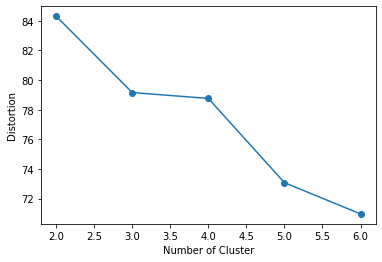

Wall time: 5min 1s


In [ ]:
'''
%%time
visualize_elbowmethod(buy_3)
'''

최적 K 개수 : *5* -> 이번엔 **3**으로 

#### 3-2. Clustering

In [39]:
%%time
model_dtw = TimeSeriesKMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=1234, metric = 'dtw').fit(buy_3)

CPU times: user 8min 51s, sys: 10min 30s, total: 19min 21s
Wall time: 7min 29s


In [40]:
result_dtw = model_dtw.predict(buy_3)
buy_3['cluster'] = result_dtw
buy_3.head()

/usr/local/lib/python3.7/dist-packages/tslearn/utils/utils.py:89: UserWarning: 2-Dimensional data passed. Assuming these are 94 1-dimensional timeseries
  '{} 1-dimensional timeseries'.format(X.shape[0]))


date,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,01-11,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,02-09,...,11-23,11-24,11-25,11-26,11-27,11-28,11-29,11-30,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
sm_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
갈비/찜/바비큐용 돈육,-0.608835,-1.045855,-0.565366,-1.077237,-0.285894,-1.098971,-0.669797,0.058782,-0.128346,-0.520095,-0.474824,0.353945,0.255557,0.202441,-0.136192,-0.376436,0.091966,-0.677643,-0.738605,-0.602791,-1.333172,-0.195352,-0.346856,0.676886,-0.000378,-1.219094,0.353945,0.521140,-1.136397,-0.016069,-1.226939,-1.061546,-0.579255,-0.655908,-0.278048,0.074473,0.029202,-0.197154,0.503647,-0.165772,...,0.149324,0.316519,1.243675,-0.368591,0.127589,0.232021,0.119744,-0.128346,0.023158,-0.549675,1.127795,1.221940,0.747495,-0.000378,0.527184,-0.157926,-0.014268,-0.264159,0.495802,0.180706,0.548918,0.564609,1.060789,2.389979,1.135640,0.775274,0.639460,-0.352900,-0.240623,1.304637,0.692577,0.865816,1.204448,-0.059539,-0.557520,1.129597,0.556764,0.761384,1.265410,1
감/홍시,0.548240,0.344748,0.526150,0.374065,-0.200442,-0.044251,0.358627,0.142817,0.498394,0.314447,-0.121854,-0.109537,-0.135733,0.310341,0.094531,0.634631,0.249161,0.125818,0.004610,0.011261,0.240949,0.307220,0.116621,0.227071,0.085744,-0.214321,0.044684,0.423912,0.396155,0.159241,-0.022161,-0.127521,-0.416828,-0.468235,-0.256531,0.332840,-0.314589,-0.089992,-0.304241,-0.279606,...,0.584374,0.356657,1.191320,1.426099,0.902998,0.634221,0.567951,0.335142,0.509317,0.543725,0.527301,0.416851,0.579693,0.280614,0.161376,0.490757,0.509317,0.168028,0.576572,0.425472,0.039018,0.292932,0.022594,0.252858,0.070471,0.107424,0.101758,0.008716,-0.234850,-0.258501,-0.253820,1.243956,-0.028237,0.116621,-0.060675,-0.175232,-0.103295,0.011837,0.382277,1
감귤/한라봉/오렌지,0.813152,0.988702,1.166240,0.742268,0.647422,0.735055,1.721783,1.182952,1.285055,0.753735,1.058445,0.232167,0.638456,1.485200,1.875322,1.123952,1.010148,0.494723,0.294244,1.104384,1.934237,1.408518,2.014702,1.667616,1.951785,0.858702,1.443653,3.793699,3.362381,1.948987,0.866122,0.539604,0.333322,1.063521,1.650433,1.017872,2.080406,2.007989,1.721933,0.906709,...,0.229032,0.676849,1.068655,1.537763,0.816201,0.908901,0.463091,0.077500,1.150290,1.038819,0.707508,1.462050,1.039424,0.688768,0.710196,1.127614,2.286073,1.328104,1.817862,1.376972,0.375047,0.235435,1.226348,2.180104,1.345372,1.359649,1.268383,0.514143,0.185096,1.013593,1.263800,0.747794,1.423175,1.351290,1.347052,0.749498,1.114569,1.579446,0.513378,2
감말랭이,1.054166,1.521631,0.925602,0.789616,0.547329,1.328406,1.897636,1.304631,1.320229,1.360358,0.371214,0.282779,0.829746,1.705923,1.891727,0.363037,1.642019,0.363037,0.339262,0.998439,0.860941,1.835244,2.894200,1.818133,1.167889,0.990262,1.465148,2.405229,1.738631,3.055473,1.286008,0.803702,0.065022,1.124735,2.103434,2.095257,1.445769,1.711075,1.237702,0.418008,...,-0.013723,-0.022657,0.452229,0.499779,0.910760,0.170568,0.669229,0.686339,0.411343,0.750243,0.742066,1.023727,1.853110,3.100896,1.370048,1.192421,4.017818,1.682904,1.586292,1.769827,0.444052,0.291712,0.548841,1.545406,0.645454,1.466660,1.144871,0.283535,0.042760,0.179502,0.290956,0.347439,0.629100,0.604568,0.854277,0.604568,0.790373,1.241483,1.578114,2
갓김치,-0.541204,-0.441354,-0.476471,-0.389774,-0.691599,-0.609246,-0.124225,-0.564822,0.414279,-0.453018,-0.504929,-0.683451,-0.535537,-0.262666,-0.350521,-0.253525,-0.492272,-0.623392,-0.647507,-0.500255,-0.357842,-0.474155,1.864546,-0.190777,-0.327234,-0.616071,-0.447186,0.003876,0.158077,-0.666658,-0.525569,-0.553530,-0.717575,-0.516262,-0.447889,-0.403300,-0.390477,-0.023423,-0.584635,-0.533386,...,-0.564160,-0.365329,0.215530,-0.393786,-0.089314,-0

In [41]:
buy_3_dtw = buy_3.reset_index()
buy_3_dtw.head()

date,sm_cat,01-01,01-02,01-03,01-04,01-05,01-06,01-07,01-08,01-09,01-10,01-11,01-12,01-13,01-14,01-15,01-16,01-17,01-18,01-19,01-20,01-21,01-22,01-23,01-24,01-25,01-26,01-27,01-28,01-29,01-30,01-31,02-01,02-02,02-03,02-04,02-05,02-06,02-07,02-08,...,11-23,11-24,11-25,11-26,11-27,11-28,11-29,11-30,12-01,12-02,12-03,12-04,12-05,12-06,12-07,12-08,12-09,12-10,12-11,12-12,12-13,12-14,12-15,12-16,12-17,12-18,12-19,12-20,12-21,12-22,12-23,12-24,12-25,12-26,12-27,12-28,12-29,12-30,12-31,cluster
0,갈비/찜/바비큐용 돈육,-0.608835,-1.045855,-0.565366,-1.077237,-0.285894,-1.098971,-0.669797,0.058782,-0.128346,-0.520095,-0.474824,0.353945,0.255557,0.202441,-0.136192,-0.376436,0.091966,-0.677643,-0.738605,-0.602791,-1.333172,-0.195352,-0.346856,0.676886,-0.000378,-1.219094,0.353945,0.521140,-1.136397,-0.016069,-1.226939,-1.061546,-0.579255,-0.655908,-0.278048,0.074473,0.029202,-0.197154,0.503647,...,0.149324,0.316519,1.243675,-0.368591,0.127589,0.232021,0.119744,-0.128346,0.023158,-0.549675,1.127795,1.221940,0.747495,-0.000378,0.527184,-0.157926,-0.014268,-0.264159,0.495802,0.180706,0.548918,0.564609,1.060789,2.389979,1.135640,0.775274,0.639460,-0.352900,-0.240623,1.304637,0.692577,0.865816,1.204448,-0.059539,-0.557520,1.129597,0.556764,0.761384,1.265410,1
1,감/홍시,0.548240,0.344748,0.526150,0.374065,-0.200442,-0.044251,0.358627,0.142817,0.498394,0.314447,-0.121854,-0.109537,-0.135733,0.310341,0.094531,0.634631,0.249161,0.125818,0.004610,0.011261,0.240949,0.307220,0.116621,0.227071,0.085744,-0.214321,0.044684,0.423912,0.396155,0.159241,-0.022161,-0.127521,-0.416828,-0.468235,-0.256531,0.332840,-0.314589,-0.089992,-0.304241,...,0.584374,0.356657,1.191320,1.426099,0.902998,0.634221,0.567951,0.335142,0.509317,0.543725,0.527301,0.416851,0.579693,0.280614,0.161376,0.490757,0.509317,0.168028,0.576572,0.425472,0.039018,0.292932,0.022594,0.252858,0.070471,0.107424,0.101758,0.008716,-0.234850,-0.258501,-0.253820,1.243956,-0.028237,0.116621,-0.060675,-0.175232,-0.103295,0.011837,0.382277,1
2,감귤/한라봉/오렌지,0.813152,0.988702,1.166240,0.742268,0.647422,0.735055,1.721783,1.182952,1.285055,0.753735,1.058445,0.232167,0.638456,1.485200,1.875322,1.123952,1.010148,0.494723,0.294244,1.104384,1.934237,1.408518,2.014702,1.667616,1.951785,0.858702,1.443653,3.793699,3.362381,1.948987,0.866122,0.539604,0.333322,1.063521,1.650433,1.017872,2.080406,2.007989,1.721933,...,0.229032,0.676849,1.068655,1.537763,0.816201,0.908901,0.463091,0.077500,1.150290,1.038819,0.707508,1.462050,1.039424,0.688768,0.710196,1.127614,2.286073,1.328104,1.817862,1.376972,0.375047,0.235435,1.226348,2.180104,1.345372,1.359649,1.268383,0.514143,0.185096,1.013593,1.263800,0.747794,1.423175,1.351290,1.347052,0.749498,1.114569,1.579446,0.513378,2
3,감말랭이,1.054166,1.521631,0.925602,0.789616,0.547329,1.328406,1.897636,1.304631,1.320229,1.360358,0.371214,0.282779,0.829746,1.705923,1.891727,0.363037,1.642019,0.363037,0.339262,0.998439,0.860941,1.835244,2.894200,1.818133,1.167889,0.990262,1.465148,2.405229,1.738631,3.055473,1.286008,0.803702,0.065022,1.124735,2.103434,2.095257,1.445769,1.711075,1.237702,...,-0.013723,-0.022657,0.452229,0.499779,0.910760,0.170568,0.669229,0.686339,0.411343,0.750243,0.742066,1.023727,1.853110,3.100896,1.370048,1.192421,4.017818,1.682904,1.586292,1.769827,0.444052,0.291712,0.548841,1.545406,0.645454,1.466660,1.144871,0.283535,0.042760,0.179502,0.290956,0.347439,0.629100,0.604568,0.854277,0.604568,0.790373,1.241483,1.578114,2
4,갓김치,-0.541204,-0.441354,-0.476471,-0.389774,-0.691599,-0.609246,-0.124225,-0.564822,0.414279,-0.453018,-0.504929,-0.683451,-0.535537,-0.262666,-0.350521,-0.253525,-0.492272,-0.623392,-0.647507,-0.500255,-0.357842,-0.474155,1.864546,-0.190777,-0.327234,-0.616071,-0.447186,0.003876,0.158077,-0.666658,-0.525569,-0.553530,-0.717575,-0.516262,-0.447889,-0.403300,-0.390477,-0.023423,-0.584635,...,-0.564160,-0.365329,0.215530,-0.393786,-0.089314,-0.264155,-0.424560,-0.407933,-0.520398,-0.165670,-0.169145,-0.282479,-0.417405,-0.535868,-0.699086,-0.176631,-0.386465,0.06563

In [42]:
buy_3_dtw.to_csv('../data/food_tsclustering_norm_0613.csv', encoding='CP949', index = False)
buy_3_dtw = pd.read_csv('../data/food_tsclustering_norm_0613.csv', encoding='CP949')

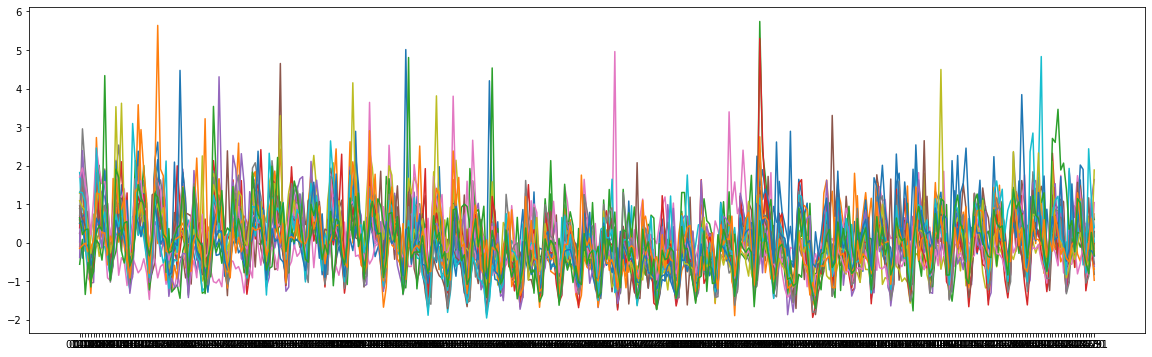

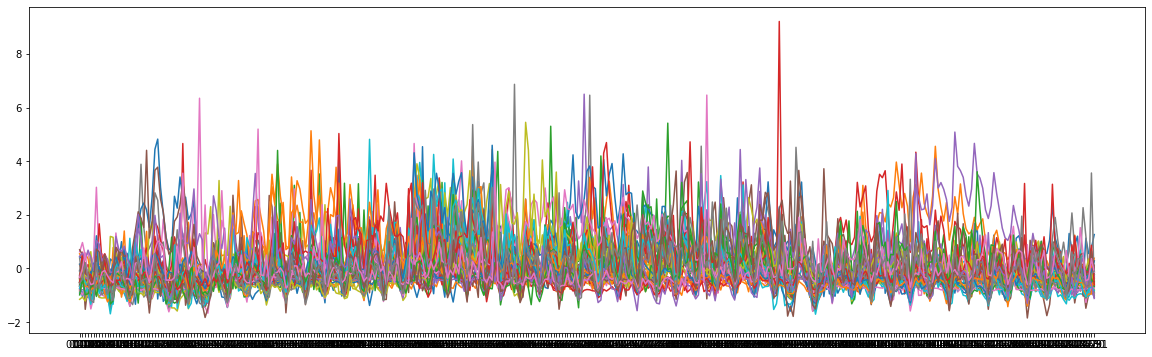

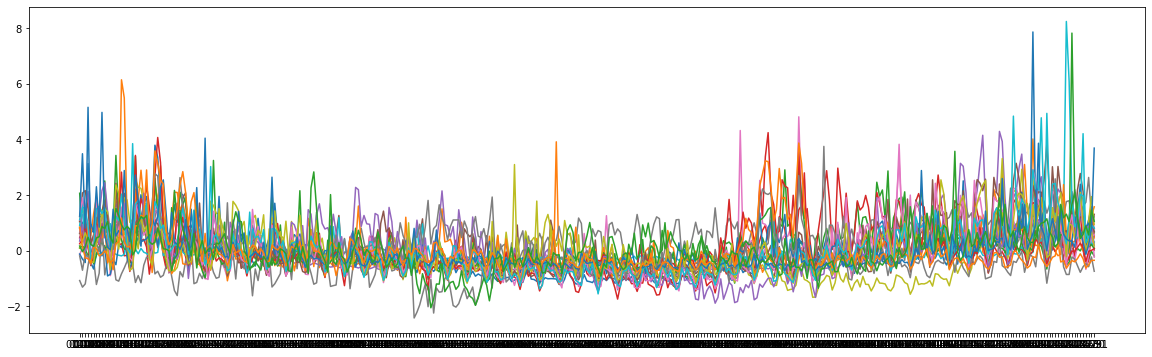

In [43]:
for i in range(3):
    clusters = buy_3_dtw.set_index('sm_cat')[buy_3_dtw.set_index('sm_cat')['cluster']==i]
    clusters.drop(['cluster'], axis=1, inplace=True)
    plt.figure(figsize=(20,6))
    plt.plot(clusters.T)
    plt.show

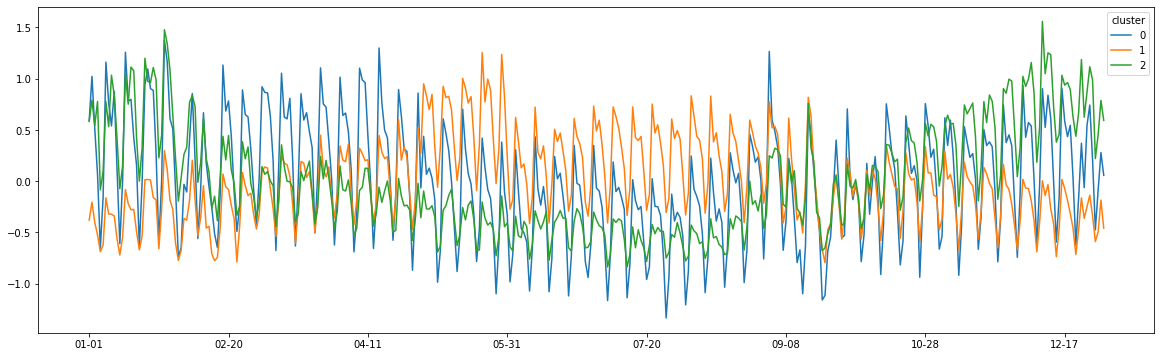

In [44]:
plt.rcParams["figure.figsize"]=(20,6)
buy_3_dtw.groupby(['cluster']).mean().T.plot()
plt.show()

In [45]:
pd.set_option('display.max_rows', 500)

* 가을, 겨울?

In [46]:
print(buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==0]["sm_cat"]

(23,)


5            건강즙/녹용
9            견과류 땅콩
19           기타 농산물
23               나물
24               녹차
25            느타리버섯
28            닭 양념육
33             둥굴레차
35             딸기우유
38        루테인/눈 영양제
46         배/포도/과일즙
49              보리차
50               부추
55           야채/호박즙
56          양배추/양상추
59    오메가3/스쿠알렌 영양제
63           유제품 음료
67           인스턴트커피
70              전통차
76         캡슐/POD커피
84       프로폴리스/로얄젤리
85          해조류 다시마
91               홍차
Name: sm_cat, dtype: object

In [47]:
print(buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==1]["sm_cat"]

(48,)


0     갈비/찜/바비큐용 돈육
1             감/홍시
4              갓김치
6              건대추
7              건자두
8              건포도
10       견과류 마카다미아
12        견과류 잣/은행
13              계란
14      고추/피망/파프리카
16          곶감/반건시
17             과일류
20          기타 주스류
21       기타 한방/환제품
22             김치류
26         다이어트보조식
27    다이어트용 헬스보충식품
30            더치커피
37           레몬/자몽
41             무김치
42             물김치
43             미나리
44       미숫가루/곡물가루
45     바나나/파인애플/망고
47            배추김치
48             백김치
54            아이스티
57          어린이 음료
58             에이드
60           오이/가지
61             옥수수
65           음용 식초
66            이온음료
68              장어
71        절임배추/김치속
73          차 선물세트
74        참외/메론/수박
75           카페 푸드
78          키위/참다래
79             탄산수
80            탄산음료
81             토마토
82             파김치
83        포도/거봉/체리
87             허브차
88              호박
90              홍어
92             환자식
Name: sm_cat, dtype: object

In [49]:
print(buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"].shape)
buy_3_dtw[buy_3_dtw["cluster"]==2]["sm_cat"]

(23,)


2      감귤/한라봉/오렌지
3            감말랭이
11          견과류 밤
15            곡물차
18           굴 생물
29         대게/킹크랩
31         도라지/더덕
32          돼지 곱창
34    딸기/복분자/블루베리
36            랍스타
39          명태/동태
40           무/배추
51            생선류
52          수산 생물
53            시금치
62            유자차
64            율무차
69            전통주
72             조개
77        코코아/핫초코
86           해초류 
89           혼합견과
93              회
Name: sm_cat, dtype: object